# **Import Modules and Libraries**

## *Python*

In [1]:
#important python libraries
import os
import sys

## *Custom*

In [2]:
#import customised modules

#define path
sys.path.append(os.path.abspath(os.path.join('..')))

##sentiment analyser module
from script.news_sentiment_analyser import add_sentiment_column

##data loader module
from script.news_data_loader import load_and_filter_data

##analyser module
from script.news_analyser import analyse_stock_news

# **Preprocess Data**

In [3]:
#load data
text_path = 'C:/Users/nuhamin/Documents/kifiya/week 1/' \
'Stock-Market-Price-Prediction-with-Sentiment-Analysis/' \
'data/raw_analyst_ratings.csv'

#select stock tickers
tickers = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']

#call load_and_filter_data to load processed dataframe
stock_news = load_and_filter_data (file_path=text_path, tickers=tickers)
stock_news.head()

File loaded successfully. The new DataFrame is 'stock_news'.


,Date,Headline,Publisher,Stock,Url
0,2019-07-01 00:00:00-04:00,Tesla shares are trading higher after JMP Secu...,Hal Lindon,TSLA,https://www.benzinga.com/markets/wiim/19/07/14...
1,2019-07-01 00:00:00-04:00,"UPDATE: JMP Reiterates Outperform, $347 Target...",Benzinga_Newsdesk,TSLA,https://www.benzinga.com/analyst-ratings/analy...
2,2019-07-01 00:00:00-04:00,'Tesla Electric Airplane? Elon Musk sees elect...,Benzinga Newsdesk,TSLA,https://www.benzinga.com/news/19/07/14011389/t...
3,2019-07-01 00:00:00-04:00,Tesla's Q2 Delivery Number Could Cause A Big Move,Wayne Duggan,TSLA,https://www.benzinga.com/analyst-ratings/analy...
4,2019-07-02 00:00:00-04:00,Electrek.Co Tweet: Tesla's head of Europe is out,Charles Gross,TSLA,https://www.benzinga.com/news/19/07/14015998/e...


In [4]:
#check the infromation of the dataframe
print ('\nDataFrame Information:')
stock_news.info()

print ('\nDataFrame Shape:')
stock_news.shape


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7331 entries, 0 to 7330
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype                    
---  ------     --------------  -----                    
 0   Date       7331 non-null   datetime64[ns, UTC-04:00]
 1   Headline   7331 non-null   object                   
 2   Publisher  7331 non-null   object                   
 3   Stock      7331 non-null   object                   
 4   Url        7331 non-null   object                   
dtypes: datetime64[ns, UTC-04:00](1), object(4)
memory usage: 286.5+ KB

DataFrame Shape:


(7331, 5)

## *Sentiment Analysis*

In [5]:
#call a function to calculate sentiment polarity using TextBlob
#call `add_sentiment_column` function from `sentiment_analyser` module
#apply the sentiment analysis function to selected stock headlines
stock_news = add_sentiment_column(stock_news, text_column='Headline')
stock_news.head()

,Date,Headline,Publisher,Stock,Url,Sentiment
0,2019-07-01 00:00:00-04:00,Tesla shares are trading higher after JMP Secu...,Hal Lindon,TSLA,https://www.benzinga.com/markets/wiim/19/07/14...,0.250000
1,2019-07-01 00:00:00-04:00,"UPDATE: JMP Reiterates Outperform, $347 Target...",Benzinga_Newsdesk,TSLA,https://www.benzinga.com/analyst-ratings/analy...,0.066667
2,2019-07-01 00:00:00-04:00,'Tesla Electric Airplane? Elon Musk sees elect...,Benzinga Newsdesk,TSLA,https://www.benzinga.com/news/19/07/14011389/t...,0.000000
3,2019-07-01 00:00:00-04:00,Tesla's Q2 Delivery Number Could Cause A Big Move,Wayne Duggan,TSLA,https://www.benzinga.com/analyst-ratings/analy...,0.000000
4,2019-07-02 00:00:00-04:00,Electrek.Co Tweet: Tesla's head of Europe is out,Charles Gross,TSLA,https://www.benzinga.com/news/19/07/14015998/e...,0.000000


In [6]:
#initialise an empty dictionary to store dataframes for each stock ticker
stock_dfs = {}

#iterate through the list of tickers
for ticker in tickers:
  stock_dfs[ticker] = stock_news[stock_news['Stock'].isin([ticker])].reset_index(drop=True)

In [7]:
#define directory to save plot images
plot_folder = 'C:/Users/nuhamin/Documents/kifiya/week 1/' \
'Stock-Market-Price-Prediction-with-Sentiment-Analysis/' \
'plot images/news_plot'

# **AAPL**

In [8]:
#assign df to a variable and display head
AAPL_df = stock_dfs['AAPL']
AAPL_df.head()

,Date,Headline,Publisher,Stock,Url,Sentiment
0,2020-03-09 00:00:00-04:00,101 Stocks Moving In Monday's Mid-Day Session,Lisa Levin,AAPL,https://www.benzinga.com/news/20/03/15508983/1...,0.000000
1,2020-03-09 00:00:00-04:00,Investor Movement Index Summary: February 2020,TD Ameritrade,AAPL,https://www.benzinga.com/news/earnings/20/03/1...,0.000000
2,2020-03-09 00:00:00-04:00,Crude Awakening: Energy Sector Takes A 20% Spi...,JJ Kinahan,AAPL,https://www.benzinga.com/news/earnings/20/03/1...,-0.466667
3,2020-03-10 00:00:00-04:00,123 Biggest Movers From Yesterday,Lisa Levin,AAPL,https://www.benzinga.com/news/20/03/15514298/1...,0.000000
4,2020-03-10 00:00:00-04:00,"UBS Maintains Buy on Apple, Lowers Price Targe...",Vick Meyer,AAPL,https://www.benzinga.com/news/20/03/15514989/u...,0.000000



--- Analysing AAPL News Headlines ---


Descriptive statistics for 'Headline' column:
count                                            441
unique                                           435
top       10 Biggest Price Target Changes For Friday
freq                                               3
Name: Headline, dtype: object


Number of unique headlines:
435


Most frequent headlines (head):
Headline
10 Biggest Price Target Changes For Friday                                                                                                                                                                                                              3
Shares of several technology, software and semiconductor companies are trading lower as equities sell off amid continued global coronavirus concerns. The virus has caused global economic disruption and negatively impacted stocks across sectors.    2
10 Biggest Price Target Changes For Wednesday                                                 

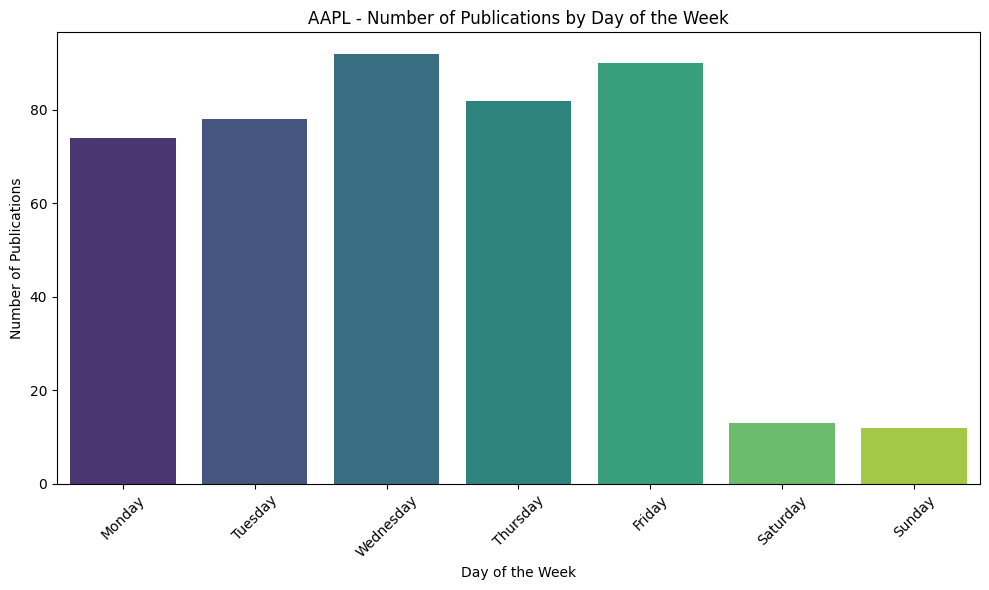



Sentiment distribution:
count    441.000000
mean       0.054114
std        0.202915
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.100000
max        1.000000
Name: Sentiment, dtype: float64


Most Positive Headlines:
                                              Headline  Sentiment
120    8 Best Investment Strategies During A Recession   1.000000
115  For Some Companies, A Sliver Of Good News Duri...   0.700000
228  Apple Reportedly Shifting Away From Intel, Wil...   0.600000
410            The Most Popular Smartphone Model Of Q1   0.550000
374  Quick Retreat: Impressive Thursday Turnaround ...   0.544444


Most Negative Headlines:
                                              Headline  Sentiment
29   Selling Picks Up In Worst Day Since 1987 As Fe...       -1.0
385  Apple Looking To Diversify Its Manufacturing B...       -0.8
426  A Peek Into The Markets: US Stock Futures Up; ...       -0.7
232  Hearing Credit Suisse Asia Sees Apple Cutting ...       -0.6
31

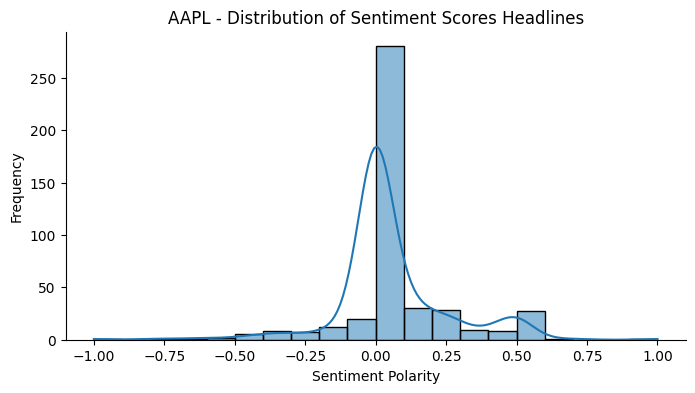



Top 10 TF-IDF terms:
apple: 0.0585
stock: 0.0245
target: 0.0219
price: 0.0214
price target: 0.0207
say: 0.0206
coronavirus: 0.0197
share: 0.0192
market: 0.0181
iphone: 0.0178

Topics discovered by LDA (10 topics):
Topic #1: lower, maintains, apple lower, price, price target, maintains buy, target, apple, buy, buy apple
Topic #2: earnings, bank, market, stock, apple, market stock, stock future, peek market, peek, future
Topic #3: barrons, barrons pick, pan, biggest mover, mover, stock, apple google, pick, google, biggest
Topic #4: retail, content, take, turn, hearing apple, notice, close, store, say, apple
Topic #5: build, video, hope, report, coronavirus, crude, maker, lift, disney, apple
Topic #6: share trading, apple share, company, trading higher, apple, market, trading, higher, stock, share
Topic #7: go, expected, covid19, store, q1, time, new, challenge, better, apple
Topic #8: maintains overweight, top, raise, morgan, maintains, overweight, price target, target, price, apple
To

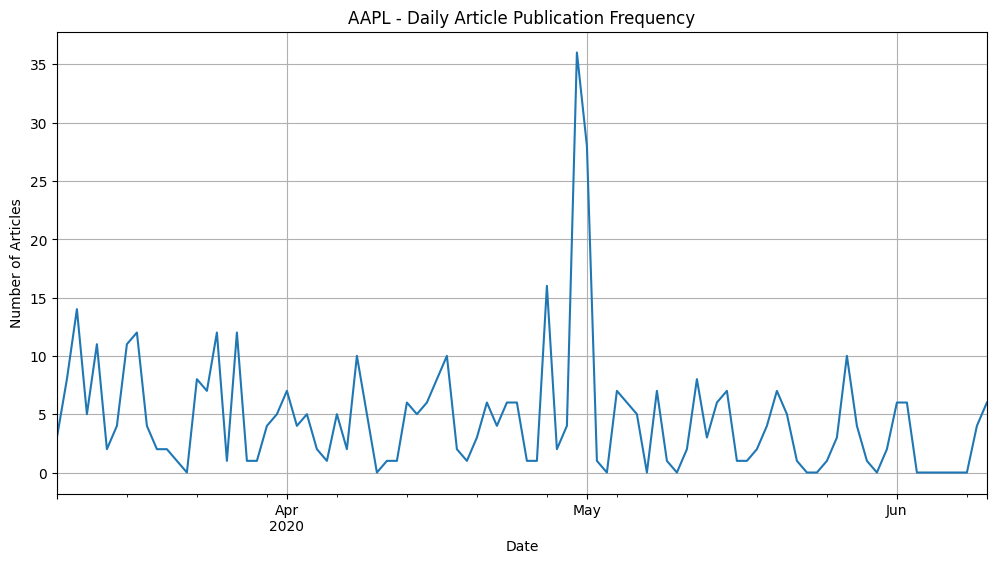



Number of articles published at 00:00 is 432


Plot is saved to ..\plot images\news_plot\AAPL - Article Publishing Frequency at 00 00 Hour.png.



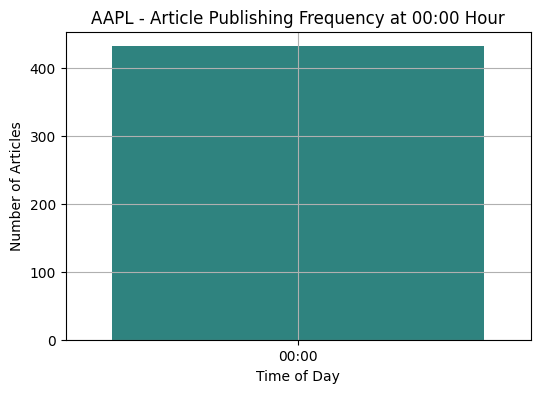



Plot is saved to ..\plot images\news_plot\AAPL - Article Publishing Frequency Hours (Excluding 00 00 Hour).png.



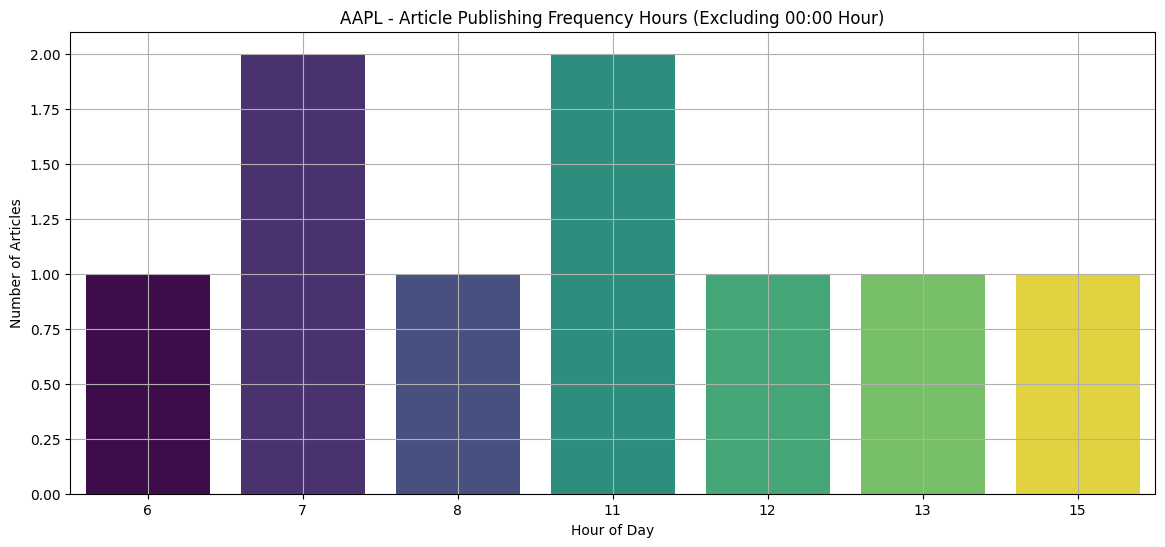


Domains with the most contributions:

Domain
benzinga.com    4
Name: count, dtype: int64

--- Analysis for AAPL Complete ---



In [9]:
analyse_stock_news(df = AAPL_df, ticker='AAPL', plot_folder=plot_folder)

# **AMZN** #

In [10]:
#assign df to a variable and display head
AMZN_df = stock_dfs['AMZN']
AMZN_df.head()

,Date,Headline,Publisher,Stock,Url,Sentiment
0,2020-04-27 00:00:00-04:00,"Apple And Amazon Earnings, Fed Meeting Among H...",JJ Kinahan,AMZN,https://www.benzinga.com/news/earnings/20/04/1...,0.10
1,2020-04-27 00:00:00-04:00,SunTrust Robinson Humphrey Maintains Buy on Am...,Vick Meyer,AMZN,https://www.benzinga.com/news/20/04/15885780/s...,0.00
2,2020-04-27 00:00:00-04:00,Will COVID-19 Accelerate The Adoption Of Auton...,FreightWaves,AMZN,https://www.benzinga.com/news/20/04/15887271/w...,0.40
3,2020-04-27 00:00:00-04:00,Amazon Statement Shows Co. Extends Closure Of ...,Benzinga Newsdesk,AMZN,https://www.benzinga.com/news/20/04/15888140/a...,0.00
4,2020-04-27 00:00:00-04:00,3 Sector ETFs For This Week's Earnings Parade,ETF Professor,AMZN,https://www.benzinga.com/news/earnings/20/04/1...,-0.25



--- Analysing AMZN News Headlines ---


Descriptive statistics for 'Headline' column:
count                                   278
unique                                  275
top       Morning Market Stats in 5 Minutes
freq                                      3
Name: Headline, dtype: object


Number of unique headlines:
275


Most frequent headlines (head):
Headline
Morning Market Stats in 5 Minutes                                                                                                                     3
UPDATE: Judiciary Panel Says Will Investigate Related To Amazon 'Possibly Criminally False, Perjurious' Statements By Co. About Business Practices    2
Will COVID-19 Accelerate The Adoption Of Autonomous Vehicles?                                                                                         1
Amazon Offers Full-Time Employment To 125,000 Workers Hired To Meet Increased Demand During Pandemic                                                  1
Oscar Organizers To Al

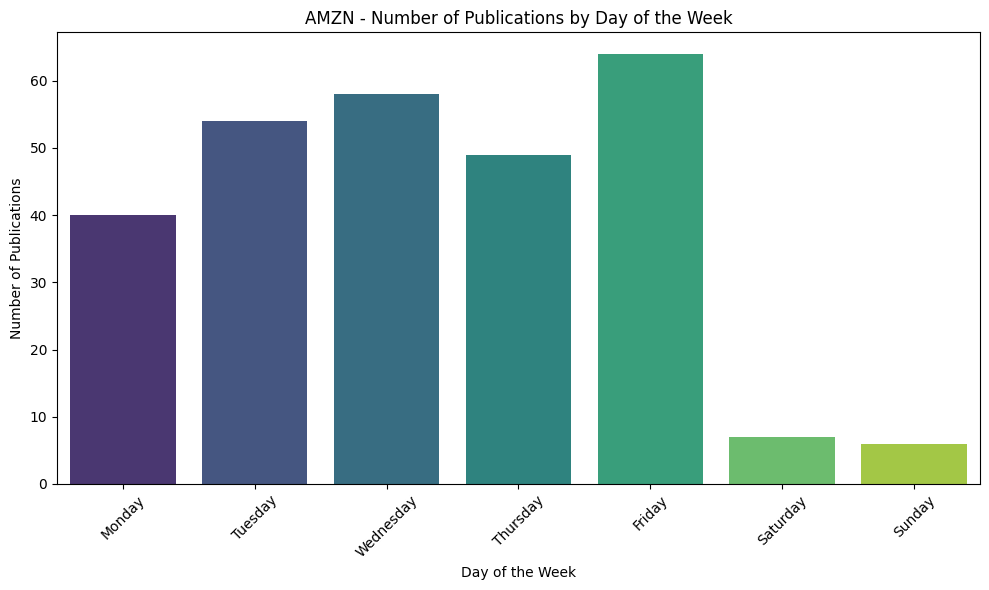



Sentiment distribution:
count    278.000000
mean       0.040260
std        0.186108
min       -0.625000
25%        0.000000
50%        0.000000
75%        0.034470
max        0.800000
Name: Sentiment, dtype: float64


Most Positive Headlines:
                                              Headline  Sentiment
47   'Jeff Bezos and Elon Musk win contracts for sp...   0.800000
178  Quick Retreat: Impressive Thursday Turnaround ...   0.544444
61   Amazon Says Increased Grocery Delivery Capacit...   0.500000
62   Amazon Says Seeing More Use Of Prime Video Ben...   0.500000
64   Apple Has 'Better Days Ahead,' Analysts Say Af...   0.500000


Most Negative Headlines:
                                              Headline  Sentiment
231  Trump Gets Mad Over Fact Check Warning On Twit...  -0.625000
83   Disappointment From Amazon, Apple Weighs On Ma...  -0.600000
208  Amazon Issues Press Release Highlighting 'Cruc...  -0.400000
221  The Secret to Tech's Resilience to COVID-19- I...  -0.400000
25

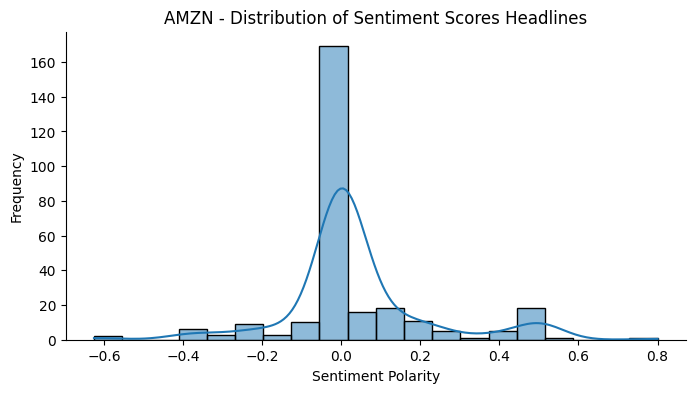



Top 10 TF-IDF terms:
amazon: 0.0557
stock: 0.0295
amazoncom: 0.0207
target: 0.0207
earnings: 0.0198
market: 0.0197
price: 0.0193
raise: 0.0183
buy: 0.0179
price target: 0.0179

Topics discovered by LDA (10 topics):
Topic #1: investigation, stanley maintains, company, innovation, overweight amazoncom, stanley, morgan stanley, morgan, amazon, amzn
Topic #2: soaring, chain, supply, supply chain, etf, ecommerce, amazon, bezos, jeff bezos, jeff
Topic #3: depot, home, say amazon, week, point, eps, say, lower, amazon, earnings
Topic #4: buy, buy amazoncom, amazoncom raise, raise price, maintains, price, raise, price target, target, amazoncom
Topic #5: target 3000, 52week high, hit 52week, 52week, stock hit, partner, q1, amazon, stock, platform
Topic #6: september, day september, prime day, operation, day, national, etf may, buy, etf, amazon
Topic #7: market, 2020, stock future, peek market, peek, market stock, stock watch, watch, future, stock
Topic #8: network, game, video, today, earnings

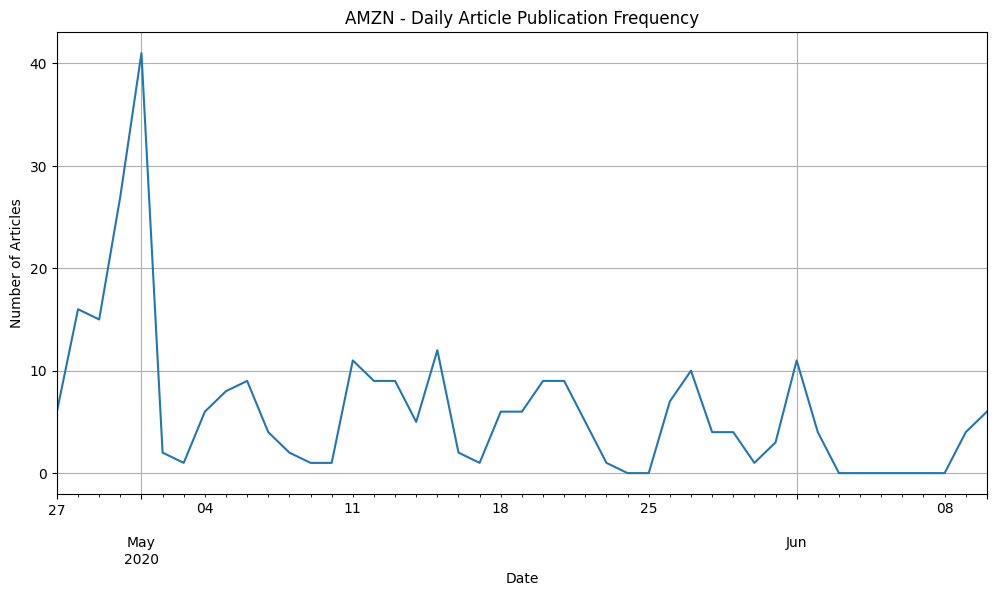



Number of articles published at 00:00 is 270


Plot is saved to ..\plot images\news_plot\AMZN - Article Publishing Frequency at 00 00 Hour.png.



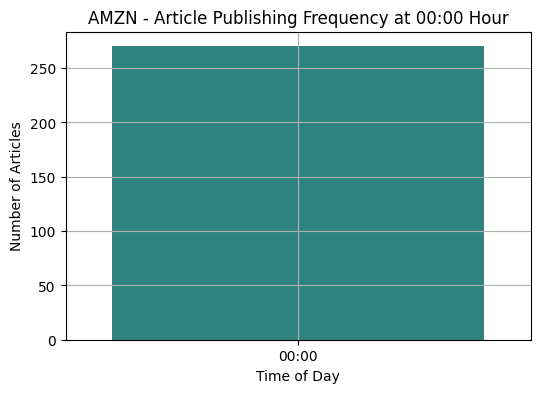



Plot is saved to ..\plot images\news_plot\AMZN - Article Publishing Frequency Hours (Excluding 00 00 Hour).png.



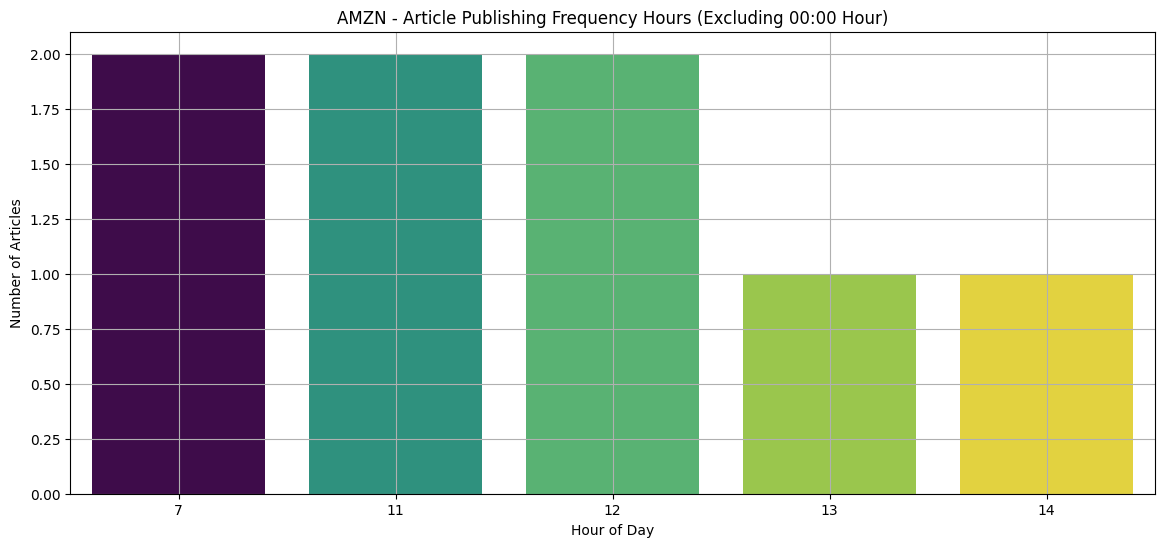


Domains with the most contributions:

Domain
benzinga.com    1
Name: count, dtype: int64

--- Analysis for AMZN Complete ---



In [11]:
analyse_stock_news(df = AMZN_df, ticker='AMZN', plot_folder=plot_folder)

# **GOOG** #

In [12]:
#assign df to a variable and display head
GOOG_df = stock_dfs['GOOG']
GOOG_df.head()

,Date,Headline,Publisher,Stock,Url,Sentiment
0,2018-11-13 00:00:00-04:00,"Day After Selloff, Earnings, Trade News Seem T...",JJ Kinahan,GOOG,https://www.benzinga.com/news/earnings/18/11/1...,0.000000
1,2018-11-13 00:00:00-04:00,Startup Point Of Sale Operating System Poynt R...,Spencer White,GOOG,https://www.benzinga.com/fintech/18/11/1268071...,0.000000
2,2018-11-14 00:00:00-04:00,UPDATE: JANA Partners 13F Shows Fund Liquidate...,Benzinga Newsdesk,GOOG,https://www.benzinga.com/news/18/11/12696718/u...,0.000000
3,2018-11-14 00:00:00-04:00,"Moderate Inflation, Positive Retail Earnings O...",JJ Kinahan,GOOG,https://www.benzinga.com/news/earnings/18/11/1...,0.113636
4,2018-11-15 00:00:00-04:00,Loup's Munster On Alphabet/Google Notes Short-...,Benzinga Newsdesk,GOOG,https://www.benzinga.com/analyst-ratings/analy...,0.436111



--- Analysing GOOGL News Headlines ---


Descriptive statistics for 'Headline' column:
count                                        1199
unique                                       1183
top       Stocks That Hit 52-Week Highs On Friday
freq                                            4
Name: Headline, dtype: object


Number of unique headlines:
1183


Most frequent headlines (head):
Headline
Stocks That Hit 52-Week Highs On Friday                                                                         4
Stocks That Hit 52-Week Highs On Tuesday                                                                        4
Stocks That Hit 52-Week Highs On Thursday                                                                       3
Alphabet shares are trading higher after the company reported better-than-expected Q2 EPS and sales results.    2
Q4 13F Roundup: How Buffett, Einhorn, Ackman And Others Adjusted Their Portfolios                               2
Name: count, dtype: int64


Basic 

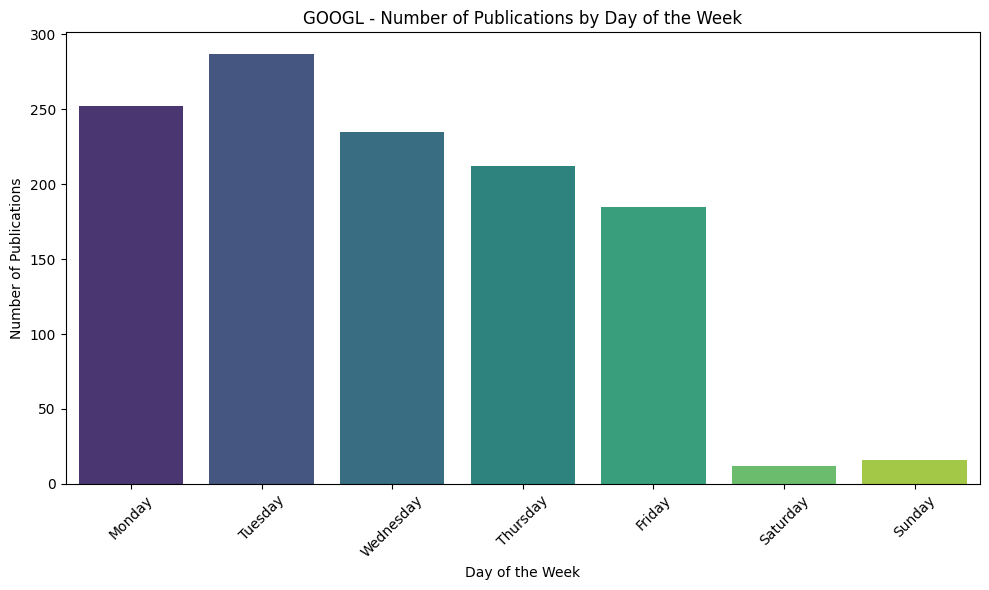



Sentiment distribution:
count    1199.000000
mean        0.047689
std         0.175878
min        -0.700000
25%         0.000000
50%         0.000000
75%         0.068182
max         1.000000
Name: Sentiment, dtype: float64


Most Positive Headlines:
                                               Headline  Sentiment
13    This Leveraged ETF Rapidly Became One Of Novem...        1.0
1019  Ty Cobb: The Greatest Pro Athlete Investor Of ...        1.0
1106  Analysts Applaud Alphabet Earnings: 'An Incred...        0.9
241   'Great Technology' Is How AMD Differentiates I...        0.8
448   Welcome To Minority Report: See The Pixel 4's ...        0.8


Most Negative Headlines:
                                               Headline  Sentiment
1065  Crude Oil Bounce Gives Energy Stock A Lift As ...      -0.70
205   Meetings Are Expensive, But Artificial Intelli...      -0.55
9     Munster: There's Something 'Fundamentally Wron...      -0.50
469   The Lesson From The Capital One Data Breach:

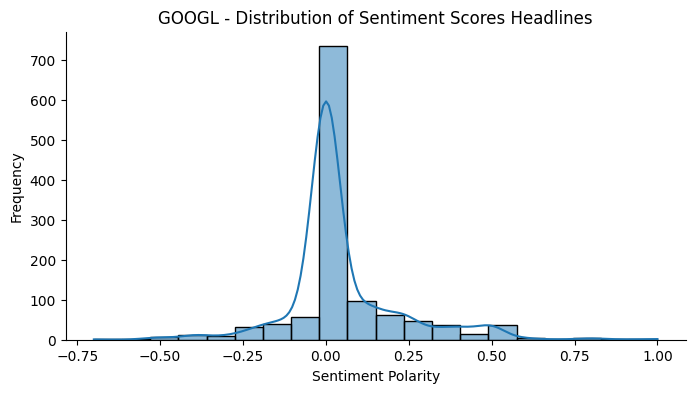



Top 10 TF-IDF terms:
google: 0.0553
alphabet: 0.0286
stock: 0.0234
say: 0.0227
earnings: 0.0189
share: 0.0169
cloud: 0.0164
youtube: 0.0154
apple: 0.0150
company: 0.0149

Topics discovered by LDA (10 topics):
Topic #1: apps, user, huawei, fall, pichai, say, alphabet, biggest, ceo, google
Topic #2: amazon, game, maintains buy, youtube, buy, buy alphabet, video, announces, cloud, google
Topic #3: china, google, service, communication service, employee, communication, session, stock moving, moving, stock
Topic #4: stake, app, raise, maintains, price, new, target, update, alphabet, google
Topic #5: big tech, global, social medium, social, medium, trump, big, google, tech, coronavirus
Topic #6: focus, fed, future, 52week high, stock hit, 52week, hit 52week, stock, hit, high
Topic #7: tuesday, portfolio, ai, cfo, impact, moving tuesday, cloud, say, google, data
Topic #8: beat, revenue, q4, justice, probe, antitrust, fitbit, google, alphabet, earnings
Topic #9: say, google facebook, streami

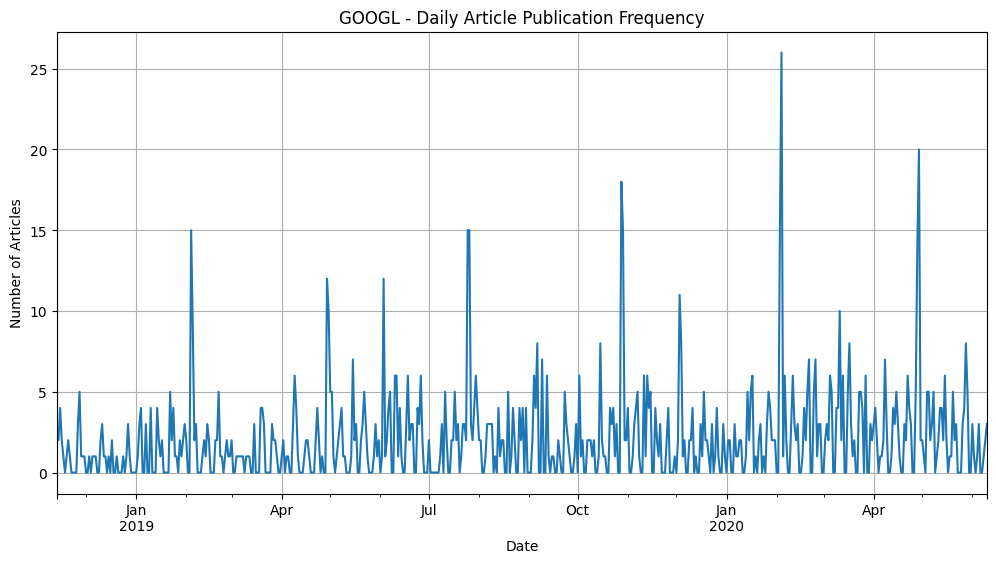



Number of articles published at 00:00 is 1190


Plot is saved to ..\plot images\news_plot\GOOGL - Article Publishing Frequency at 00 00 Hour.png.



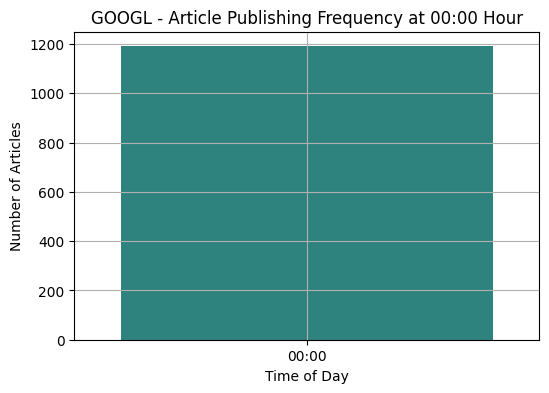



Plot is saved to ..\plot images\news_plot\GOOGL - Article Publishing Frequency Hours (Excluding 00 00 Hour).png.



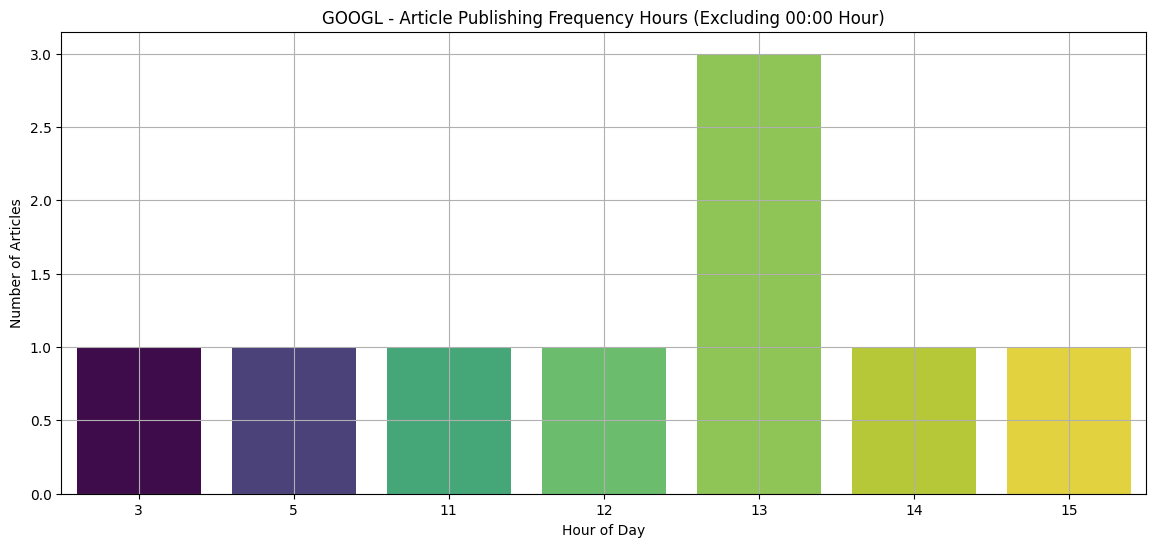


Domains with the most contributions:

Domain
benzinga.com    9
Name: count, dtype: int64

--- Analysis for GOOGL Complete ---



In [13]:
analyse_stock_news(df = GOOG_df, ticker='GOOGL', plot_folder=plot_folder)

# **META** #

In [14]:
#assign df to a variable and display head
META_df = stock_dfs['META']
META_df.head()

,Date,Headline,Publisher,Stock,Url,Sentiment
0,2020-02-19 00:00:00-04:00,Calendar Apps Can Do Wonders And Not Only For ...,IAM Newswire,META,https://www.benzinga.com/news/20/02/15364635/c...,0.000000
1,2020-02-19 00:00:00-04:00,Bloomberg Pays People To Promote His Campaign ...,Neer Varshney,META,https://www.benzinga.com/news/20/02/15371694/b...,0.016667
2,2020-02-20 00:00:00-04:00,Peter Thiel-Backed Startup Begins Mining Bitco...,Neer Varshney,META,https://www.benzinga.com/markets/cryptocurrenc...,0.000000
3,2020-02-20 00:00:00-04:00,No More Immunity? Justice Department Wants Tec...,Neer Varshney,META,https://www.benzinga.com/government/20/02/1537...,0.050000
4,2020-02-21 00:00:00-04:00,Facebook To Pay Users $5 For Their Voice Recor...,Neer Varshney,META,https://www.benzinga.com/news/20/02/15381956/f...,0.000000



--- Analysing META News Headlines ---


Descriptive statistics for 'Headline' column:
count                                   380
unique                                  371
top       Morning Market Stats in 5 Minutes
freq                                      5
Name: Headline, dtype: object


Number of unique headlines:
371


Most frequent headlines (head):
Headline
Morning Market Stats in 5 Minutes                                                                                                                                                                                               5
Shares of several communications companies are trading lower as equities sell off amid continued global coronavirus concerns. The virus has caused global economic disruption and negatively impacted stocks across sectors.    2
11 Communication Services Stocks Moving In Wednesday's Pre-Market Session                                                                                                         

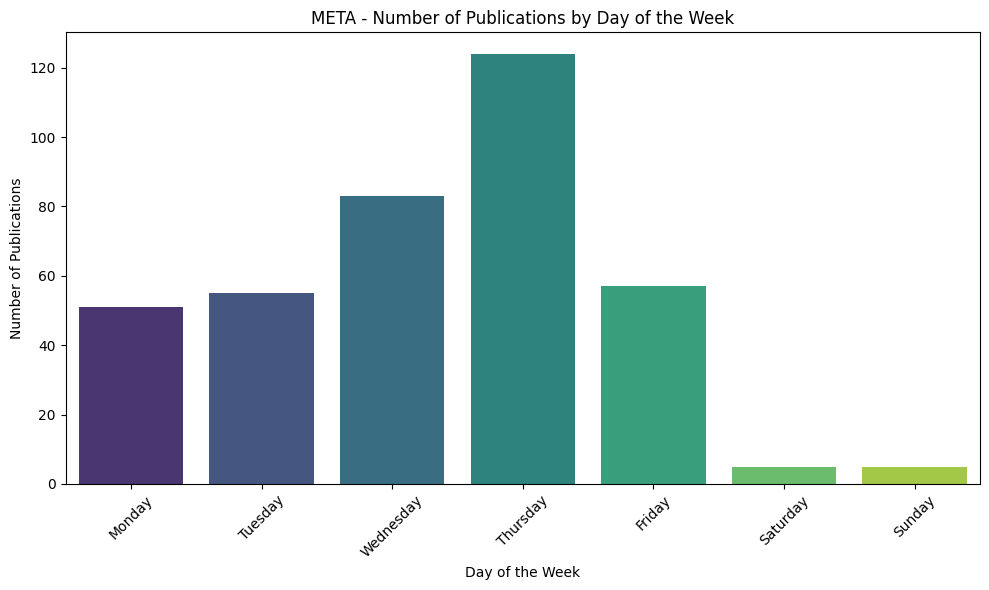



Sentiment distribution:
count    380.000000
mean       0.052653
std        0.195747
min       -0.800000
25%        0.000000
50%        0.000000
75%        0.067045
max        1.000000
Name: Sentiment, dtype: float64


Most Positive Headlines:
                                              Headline  Sentiment
69   Best Home Office Essentials During The COVID-1...        1.0
73   Hearing Wedbush Added Amazon, Peloton And Face...        1.0
76   Wedbush Maintains Outperform on Facebook, Main...        1.0
212  Munster Says Still 'Neutral' On Facebook's Lon...        1.0
109  For Some Companies, A Sliver Of Good News Duri...        0.7


Most Negative Headlines:
                                              Headline  Sentiment
273  Facebook Removed 9.6M Posts For Hate Speech In...     -0.800
325  Trump Gets Mad Over Fact Check Warning On Twit...     -0.625
247  7 Times Elon Musk Wasn't Afraid To Speak His Mind     -0.600
7        4 Coronavirus Myths Causing Unnecessary Alarm     -0.400
32

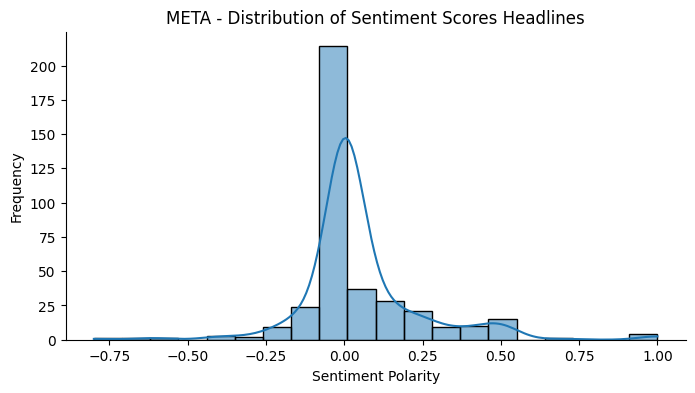



Top 10 TF-IDF terms:
facebook: 0.0523
coronavirus: 0.0309
stock: 0.0268
say: 0.0220
market: 0.0206
price: 0.0197
share: 0.0191
earnings: 0.0191
target: 0.0180
company: 0.0175

Topics discovered by LDA (10 topics):
Topic #1: apple, business, morning, morning market, hit, stats, stats minute, market stats, market, minute
Topic #2: service stock, service, communication service, day, premarket session, premarket, session, moving, stock moving, stock
Topic #3: amid, powell, facebook shop, wasnt, twitter, coronavirus, voice, user, feature, facebook
Topic #4: trump, disney, medium, say, social, tech, big, covid19, coronavirus, facebook
Topic #5: time, market, report, q1, stock future, peek market, peek, market stock, future, facebook
Topic #6: 2020, pandemic, social medium, stock, social, home, work, work home, employee work, employee
Topic #7: investor, industry, 29 2020, close, 29, lead, biggest, coronavirus, earnings, facebook
Topic #8: medium, cryptocurrency, order, earnings, social med

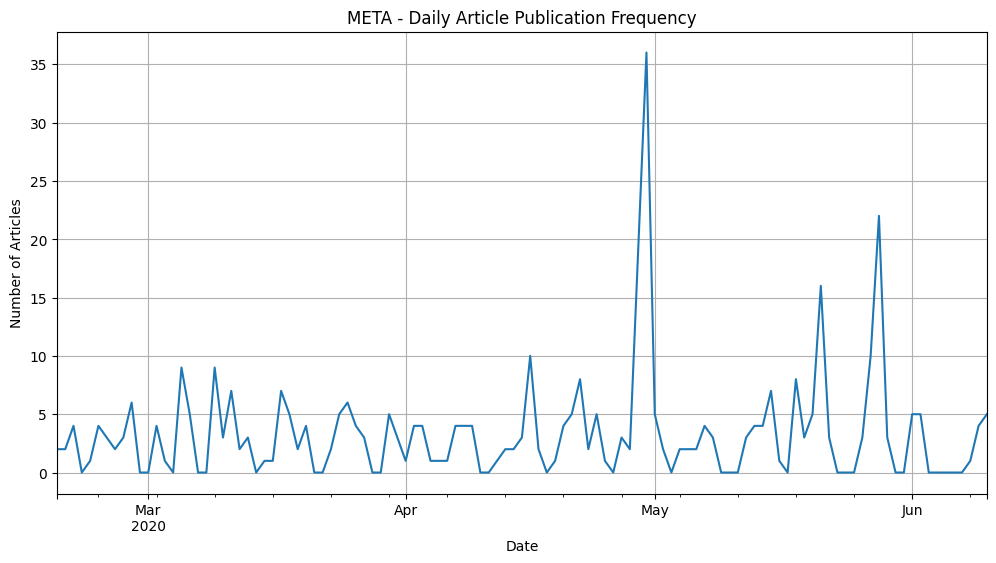



Number of articles published at 00:00 is 372


Plot is saved to ..\plot images\news_plot\META - Article Publishing Frequency at 00 00 Hour.png.



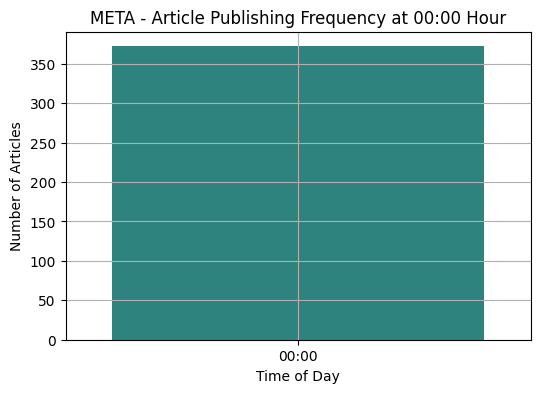



Plot is saved to ..\plot images\news_plot\META - Article Publishing Frequency Hours (Excluding 00 00 Hour).png.



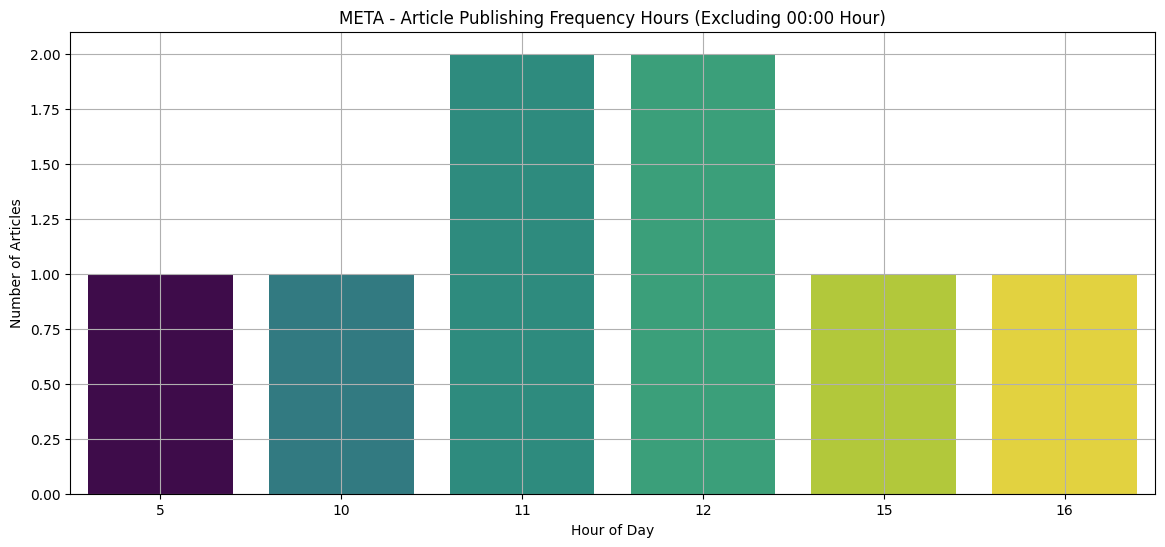


Domains with the most contributions:

Domain
benzinga.com    6
Name: count, dtype: int64

--- Analysis for META Complete ---



In [15]:
analyse_stock_news(df = META_df, ticker='META', plot_folder=plot_folder)

# **MSFT** #

In [16]:
#assign df to a variable and display head
MSFT_df = stock_dfs['MSFT']
MSFT_df.head()

,Date,Headline,Publisher,Stock,Url,Sentiment
0,2010-04-06 00:00:00-04:00,4-6-10 Daily Small Cap Market News and Stock H...,SmallCapVoice,MSFT,https://www.benzinga.com/208992/4-6-10-daily-s...,-0.125000
1,2016-06-30 00:00:00-04:00,2 Boutique Financial Firms To Make Millions Ad...,Taylor Cox,MSFT,https://www.benzinga.com/startups/16/06/817280...,0.000000
2,2017-06-09 12:36:44-04:00,Where The Top 5 Tech Firms Derive Their Revenue,Brett Hershman,MSFT,https://www.benzinga.com/news/17/06/9567359/wh...,0.500000
3,2018-01-29 16:26:39-04:00,"UPDATE: Polygon Article Speculates Valve, PUBG...",Paul Quintaro,MSFT,https://www.benzinga.com/news/18/01/11096639/u...,0.000000
4,2018-08-16 11:15:13-04:00,"Stocks Which Set New 52-Week Low Yesterday, Au...",Benzinga Newsdesk,MSFT,https://www.benzinga.com/trading-ideas/technic...,0.068182



--- Analysing MSFT News Headlines ---


Descriptive statistics for 'Headline' column:
count                                                    12
unique                                                   12
top       4-6-10 Daily Small Cap Market News and Stock H...
freq                                                      1
Name: Headline, dtype: object


Number of unique headlines:
12


Most frequent headlines (head):
Headline
4-6-10 Daily Small Cap Market News and Stock Highlights from SmallCapVoice.com              1
2 Boutique Financial Firms To Make Millions Advising On Lions Gate-Starz Deal               1
Where The Top 5 Tech Firms Derive Their Revenue                                             1
UPDATE: Polygon Article Speculates Valve, PUBG Could Be Possible Purchases For Microsoft    1
Stocks Which Set New 52-Week Low Yesterday, August 15th                                     1
Name: count, dtype: int64


Basic statistics for 'Headline_Length' column:
count    12.000000
mea

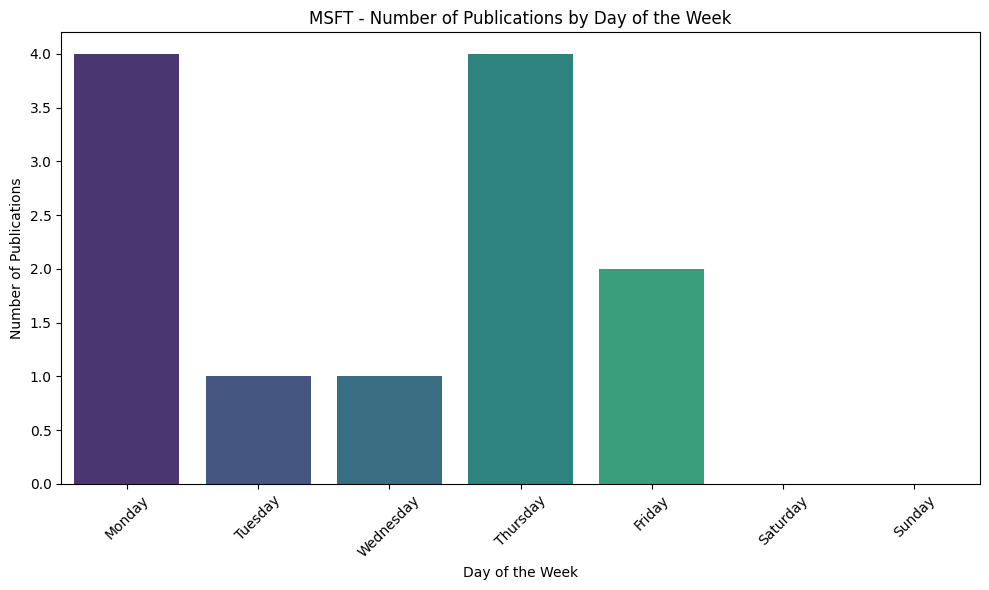



Sentiment distribution:
count    12.000000
mean      0.132008
std       0.256622
min      -0.125000
25%       0.000000
50%       0.068182
75%       0.068182
max       0.800000
Name: Sentiment, dtype: float64


Most Positive Headlines:
                                             Headline  Sentiment
11  NVIDIA with Microsoft Announces Technology Col...   0.800000
2     Where The Top 5 Tech Firms Derive Their Revenue   0.500000
4   Stocks Which Set New 52-Week Low Yesterday, Au...   0.068182
5   Stocks Which Set New 52-Week Low Yesterday, Se...   0.068182
6   Stocks Which Set New 52-Week Low Yesterday, Se...   0.068182


Most Negative Headlines:
                                             Headline  Sentiment
0   4-6-10 Daily Small Cap Market News and Stock H...  -0.125000
1   2 Boutique Financial Firms To Make Millions Ad...   0.000000
3   UPDATE: Polygon Article Speculates Valve, PUBG...   0.000000
10  LinkedIn to Acquire Glint, An Employee Engagem...   0.000000
4   Stocks Which Set 

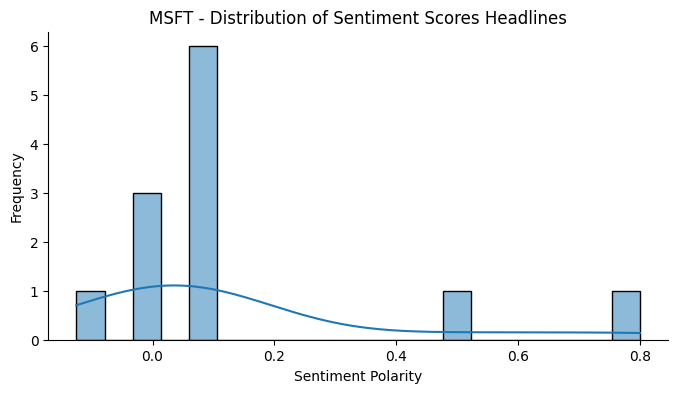



Top 10 TF-IDF terms:
stock: 0.1095
stock set: 0.1077
set: 0.1077
new 52week: 0.1077
new: 0.1077
set new: 0.1077
low: 0.1077
52week low: 0.1077
52week: 0.1077
low yesterday: 0.0999

Topics discovered by LDA (10 topics):
Topic #1: stock set, new, set, stock, low yesterday, yesterday, september, yesterday september, 5th, september 5th
Topic #2: stock set, new, set new, stock, low yesterday, yesterday, september, yesterday september, 11th, september 11th
Topic #3: microsoft announces, nvidia microsoft, technology collaboration, september 5th, 5th, 11th, september 11th, firm, stock, microsoft
Topic #4: set new, new, stock set, stock, yesterday, low yesterday, august 15th, august, 15th, yesterday august
Topic #5: boutique financial, boutique, advising lion, deal, financial, financial firm, firm make, make million, million advising, million
Topic #6: cap market, news stock, news, market, market news, friday, 7th, low friday, friday september, september 7th
Topic #7: microsoft announces, nvi

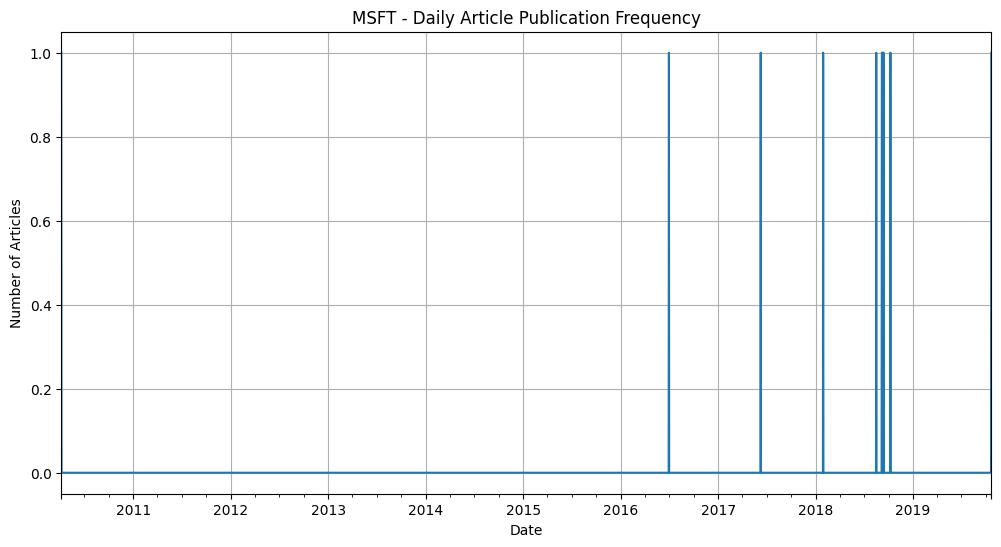



Number of articles published at 00:00 is 2


Plot is saved to ..\plot images\news_plot\MSFT - Article Publishing Frequency at 00 00 Hour.png.



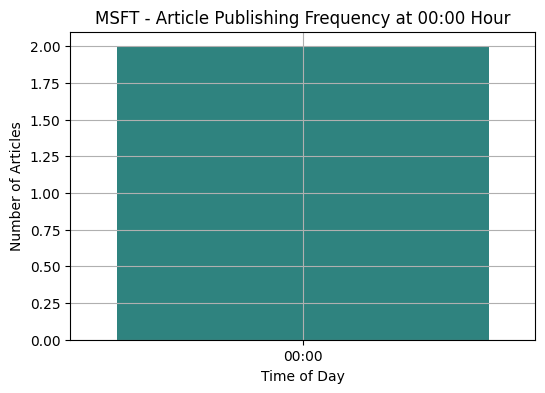



Plot is saved to ..\plot images\news_plot\MSFT - Article Publishing Frequency Hours (Excluding 00 00 Hour).png.



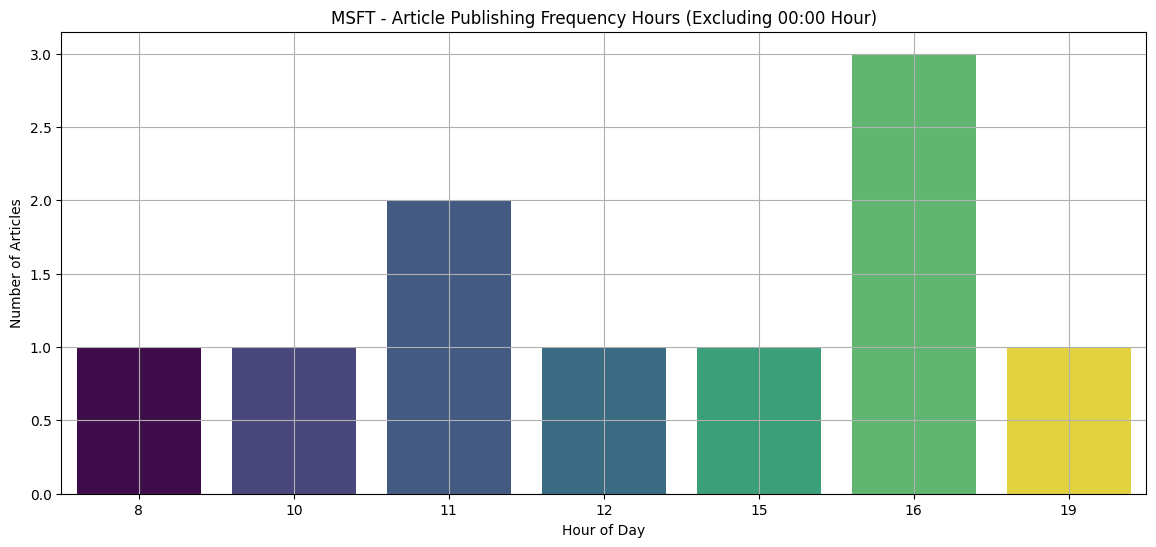


Domains with the most contributions:

Series([], Name: count, dtype: int64)

--- Analysis for MSFT Complete ---



In [17]:
analyse_stock_news(df = MSFT_df, ticker='MSFT', plot_folder=plot_folder)

# **NVDA** #

In [18]:
#assign df to a variable and display head
NVDA_df = stock_dfs['NVDA']
NVDA_df.head()

,Date,Headline,Publisher,Stock,Url,Sentiment
0,2011-03-03 00:00:00-04:00,Nvidia Goes Negative (NVDA),Scott Rubin,NVDA,https://www.benzinga.com/market-update/11/03/9...,-0.30
1,2011-03-07 00:00:00-04:00,Auriga Still Not Sure Where Reality Lies For N...,BenzingaStaffB,NVDA,https://www.benzinga.com/analyst-ratings/analy...,-0.25
2,2011-03-07 00:00:00-04:00,Goldman Sachs Gives Color On Semiconductors (N...,Benzinga Staff,NVDA,https://www.benzinga.com/analyst-ratings/analy...,0.00
3,2011-03-08 00:00:00-04:00,"JP Morgan Upgrades NVIDIA To Neutral, $21 PT",Joe Young,NVDA,https://www.benzinga.com/analyst-ratings/upgra...,0.00
4,2011-03-08 00:00:00-04:00,J.P. Morgan Upgrades NVIDIA Corporation To Neu...,Mark Page,NVDA,https://www.benzinga.com/analyst-ratings/analy...,0.00



--- Analysing NVDA News Headlines ---


Descriptive statistics for 'Headline' column:
count                             3146
unique                            2988
top       Stocks Hitting 52-Week Highs
freq                                17
Name: Headline, dtype: object


Number of unique headlines:
2988


Most frequent headlines (head):
Headline
Stocks Hitting 52-Week Highs                 17
Benzinga's Top Upgrades                      17
The Market In 5 Minutes                      10
Benzinga's Top Pre-Market Losers              8
5 Biggest Price Target Changes For Friday     7
Name: count, dtype: int64


Basic statistics for 'Headline_Length' column:
count    3146.000000
mean       76.813732
std        47.904001
min        16.000000
25%        47.000000
50%        64.000000
75%        85.000000
max       382.000000
Name: Headline_Length, dtype: float64


Number of articles per publisher (head):
Publisher
Lisa Levin           357
Benzinga Newsdesk    346
Paul Quintaro        293


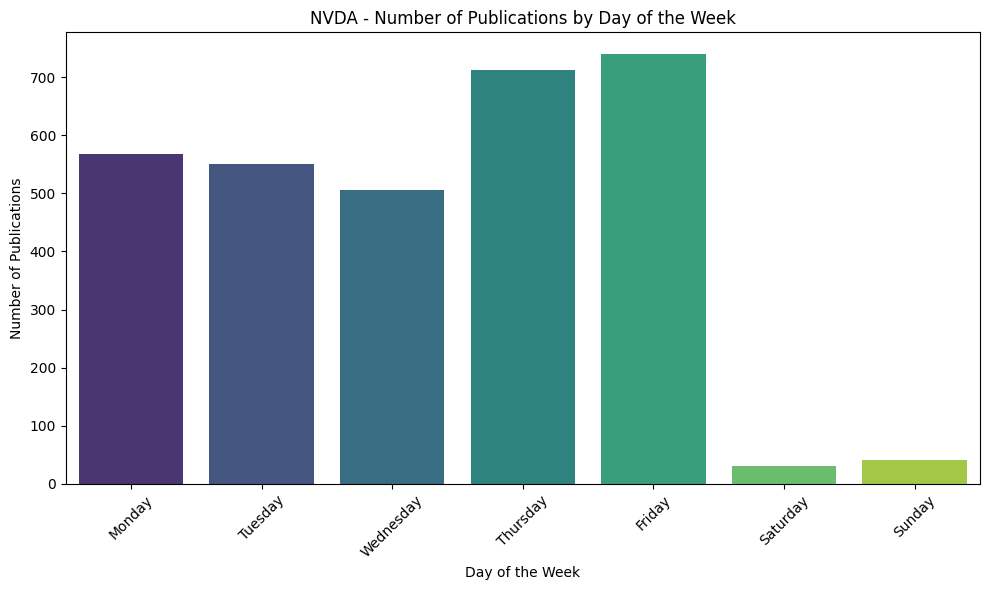



Sentiment distribution:
count    3146.000000
mean        0.073766
std         0.199379
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.125000
max         1.000000
Name: Sentiment, dtype: float64


Most Positive Headlines:
                                               Headline  Sentiment
731       Nvidia Remains JMP's 'Best Idea'...Here's Why        1.0
788   Nvidia Might Be The Best Way To Play Virtual R...        1.0
851                        The Best Stock Ideas Of 2015        1.0
970           The Best Performing Stocks Since May 2015        1.0
1014  Apple, Nvidia, Tesla: Trip Chowdhry's 3 Best S...        1.0


Most Negative Headlines:
                                               Headline  Sentiment
1099  Worst Performing Industries For November 14, 2016      -1.00
1755  Traders See Signs Of Rotation Into Financials ...      -1.00
1489  'Dr Doom': Even If The Dow Goes To 100,000, It...      -0.91
1581  Chowdhry: Betting Against Nvidia Is 'Insane'

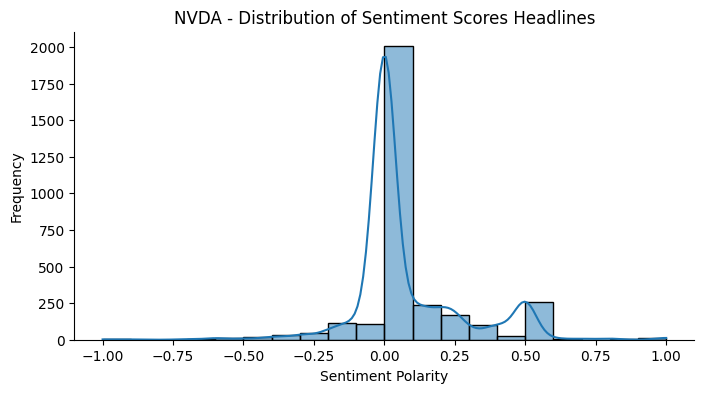



Top 10 TF-IDF terms:
nvidia: 0.0604
stock: 0.0341
market: 0.0218
share: 0.0217
earnings: 0.0202
price: 0.0176
top: 0.0174
target: 0.0172
semiconductor: 0.0157
price target: 0.0156

Topics discovered by LDA (10 topics):
Topic #1: money, goldman, nvidia, ahead, tech, stock future, pick, future, stock, market
Topic #2: stock moving, moving, watch, 52week, session, mover, hit, high, friday, stock
Topic #3: technical, ce, industry, stock, citron, bank, bank america, america, apple, nvidia
Topic #4: buy nvidia, buy, nvidia, raise price, maintains, nvidia raise, raise, price target, price, target
Topic #5: sale, watch, stock watch, upgrade, stock, top upgrade, premarket, benzingas, benzingas top, top
Topic #6: pro, graphic, call, oi, ask, alert, option alert, etf, nvidia, option
Topic #7: share several, several, trading higher, stock, higher, earnings, share, company, semiconductor, trading
Topic #8: capital, nvidia buy, buy, hold, nvidia corporation, corporation, upgrade, upgrade nvidia, n

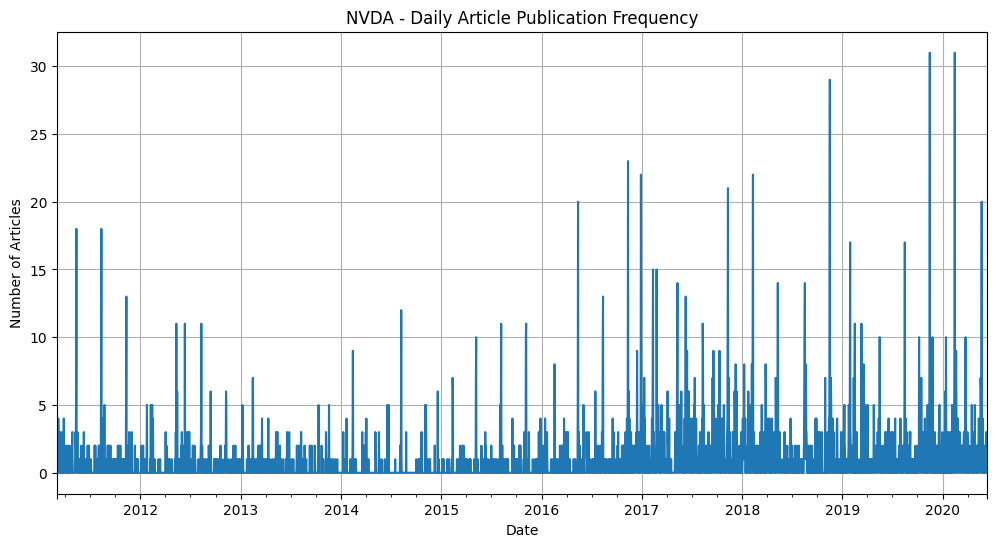



Number of articles published at 00:00 is 3136


Plot is saved to ..\plot images\news_plot\NVDA - Article Publishing Frequency at 00 00 Hour.png.



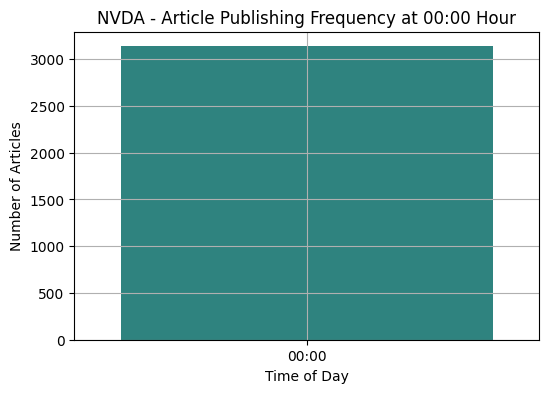



Plot is saved to ..\plot images\news_plot\NVDA - Article Publishing Frequency Hours (Excluding 00 00 Hour).png.



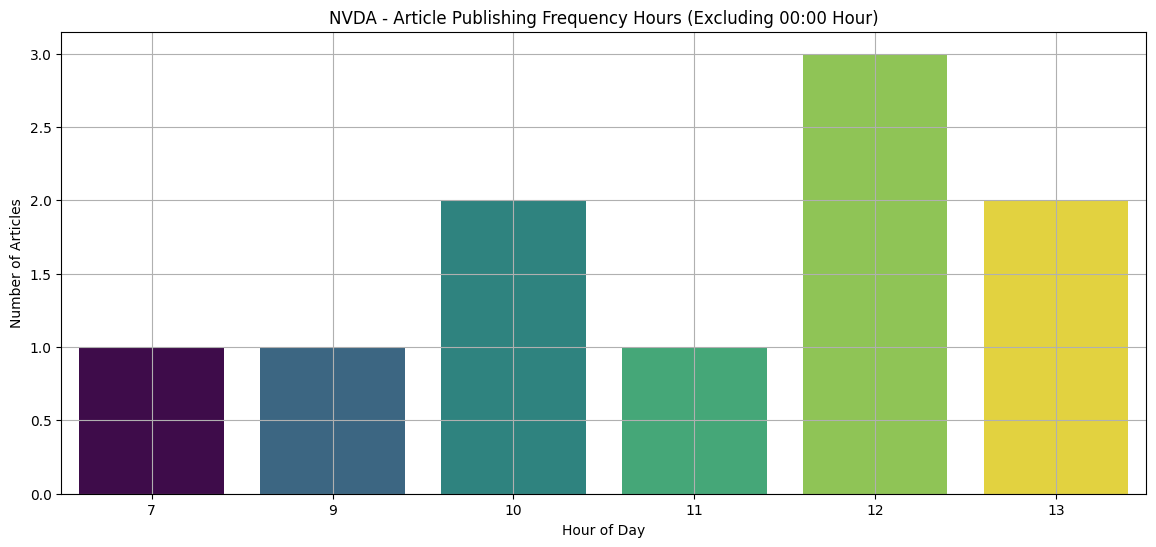


Domains with the most contributions:

Domain
benzinga.com    23
gmail.com        1
Name: count, dtype: int64

--- Analysis for NVDA Complete ---



In [19]:
analyse_stock_news(df = NVDA_df, ticker='NVDA', plot_folder=plot_folder)

# **TSLA** #

In [20]:
#assign df to a variable and display head
TSLA_df = stock_dfs['TSLA']
TSLA_df.head()

,Date,Headline,Publisher,Stock,Url,Sentiment
0,2019-07-01 00:00:00-04:00,Tesla shares are trading higher after JMP Secu...,Hal Lindon,TSLA,https://www.benzinga.com/markets/wiim/19/07/14...,0.250000
1,2019-07-01 00:00:00-04:00,"UPDATE: JMP Reiterates Outperform, $347 Target...",Benzinga_Newsdesk,TSLA,https://www.benzinga.com/analyst-ratings/analy...,0.066667
2,2019-07-01 00:00:00-04:00,'Tesla Electric Airplane? Elon Musk sees elect...,Benzinga Newsdesk,TSLA,https://www.benzinga.com/news/19/07/14011389/t...,0.000000
3,2019-07-01 00:00:00-04:00,Tesla's Q2 Delivery Number Could Cause A Big Move,Wayne Duggan,TSLA,https://www.benzinga.com/analyst-ratings/analy...,0.000000
4,2019-07-02 00:00:00-04:00,Electrek.Co Tweet: Tesla's head of Europe is out,Charles Gross,TSLA,https://www.benzinga.com/news/19/07/14015998/e...,0.000000



--- Analysing TSLA News Headlines ---


Descriptive statistics for 'Headline' column:
count                                             1875
unique                                            1827
top       10 Biggest Price Target Changes For Thursday
freq                                                 8
Name: Headline, dtype: object


Number of unique headlines:
1827


Most frequent headlines (head):
Headline
10 Biggest Price Target Changes For Thursday                        8
10 Biggest Price Target Changes For Wednesday                       6
Morning Market Stats in 5 Minutes                                   5
Stocks That Hit 52-Week Highs On Thursday                           3
5 Consumer Cyclical Stocks Moving In Friday's Pre-Market Session    3
Name: count, dtype: int64


Basic statistics for 'Headline_Length' column:
count    1875.000000
mean       87.247467
std        47.142165
min        19.000000
25%        60.000000
50%        75.000000
75%        95.000000
max       337

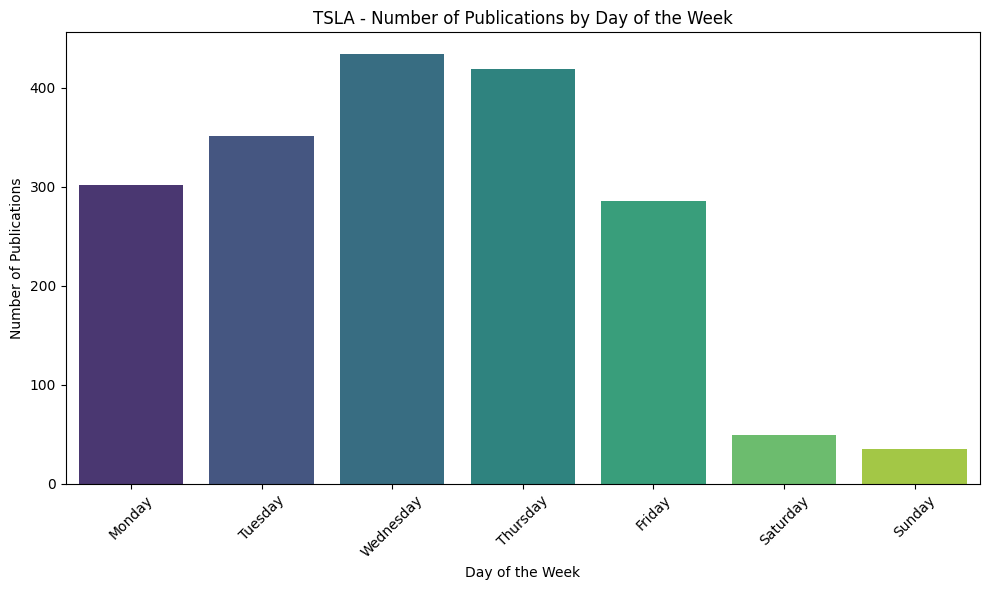



Sentiment distribution:
count    1875.000000
mean        0.061557
std         0.204869
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.123611
max         1.000000
Name: Sentiment, dtype: float64


Most Positive Headlines:
                                              Headline  Sentiment
40   'Tesla Model 3 is the best road trip car: 10 h...        1.0
68   8 Of The Best Investments For Boomers Concerne...        1.0
259  Today's Pickup: Elon And Jeff: The Best Of Ene...        1.0
624  Tesla Model 3 Named 'Best Electric Car' By Edm...        1.0
656  'Tesla Supercharger network reaches 15,000 cha...        1.0


Most Negative Headlines:
                                               Headline  Sentiment
125                        Tesla's Chart Looks Horrible       -1.0
147   'Elon Musk's Boring Company to launch China br...       -1.0
1112  Musk On Tesla Founder Martin Eberhard: 'He Is ...       -1.0
1273  Worst Of The Worst: Losses Accelerate Into Clo... 

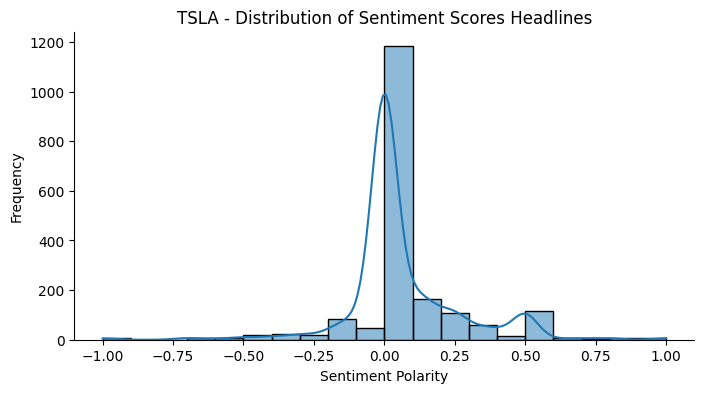



Top 10 TF-IDF terms:
tesla: 0.0683
stock: 0.0287
musk: 0.0260
say: 0.0242
model: 0.0228
price: 0.0210
elon: 0.0203
electrek: 0.0202
elon musk: 0.0200
share: 0.0195

Topics discovered by LDA (10 topics):
Topic #1: peek market, stock future, market stock, mover yesterday, peek, yesterday, mover, biggest mover, future, biggest
Topic #2: report, china, production, say, electric, tesla model, vehicle, electrek, tesla, model
Topic #3: delivery, california, new, electrek, say, tweet, tesla, elon musk, elon, musk
Topic #4: still, here, best, run, industry, earnings, car, etf, short, tesla
Topic #5: high, biggest price, target change, 10, hit, tesla, change, target, price target, price
Topic #6: benzingas, 2020, bear week, bull bear, cybertruck, upgrade, downgrade, bear, bull, week
Topic #7: cyclical stock, consumer cyclical, cyclical, consumer, premarket, premarket session, stock, session, moving, stock moving
Topic #8: coronavirus, q4, delivery, factory, fremont, pickup, today pickup, say, 

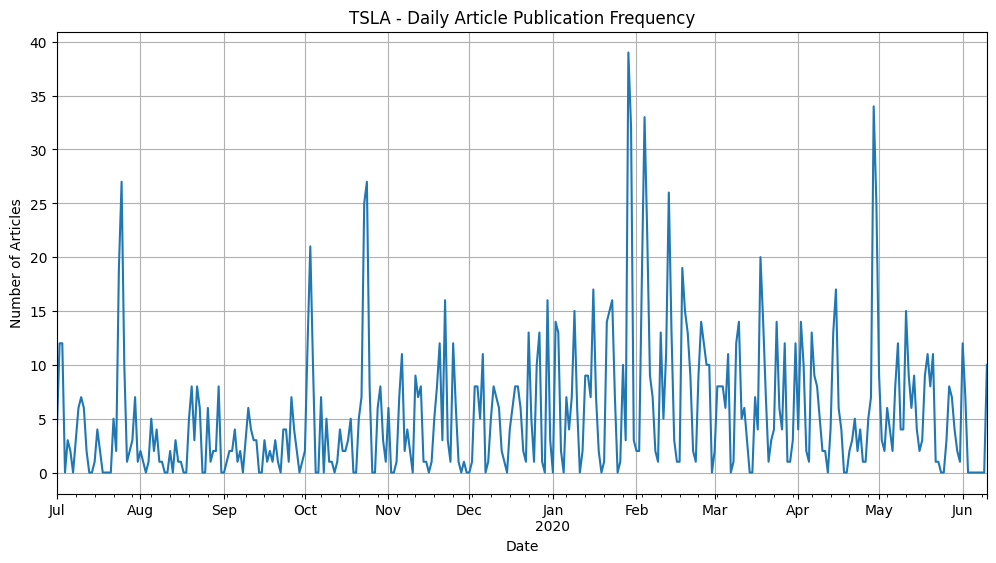



Number of articles published at 00:00 is 1865


Plot is saved to ..\plot images\news_plot\TSLA - Article Publishing Frequency at 00 00 Hour.png.



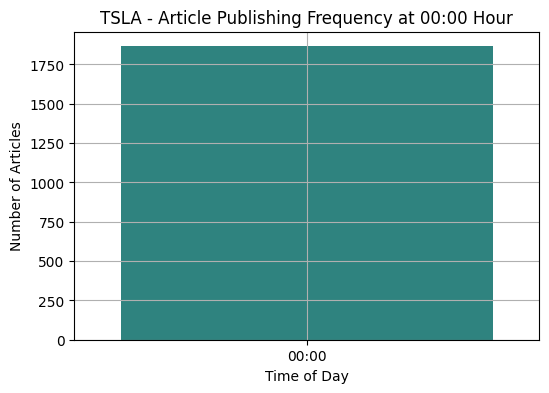



Plot is saved to ..\plot images\news_plot\TSLA - Article Publishing Frequency Hours (Excluding 00 00 Hour).png.



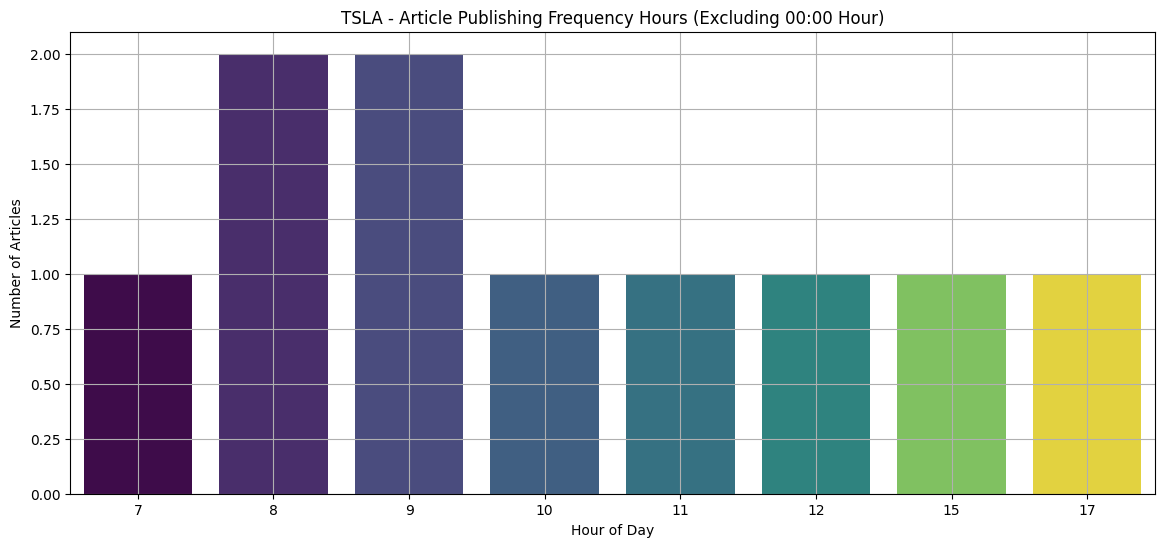


Domains with the most contributions:

Domain
benzinga.com    12
Name: count, dtype: int64

--- Analysis for TSLA Complete ---



In [21]:
analyse_stock_news(df = TSLA_df, ticker='TSLA', plot_folder=plot_folder)

# **Save Processed Data**

In [22]:
#save dataframes to repo folder
#define directory path
output_dir = 'C:/Users/nuhamin/Documents/kifiya/week 1/' \
'Stock-Market-Price-Prediction-with-Sentiment-Analysis/' \
'data/sentiment_data'

#create directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#map stock symbols to their dataFrames using dictionary
stock_dataframes = {'AAPL': stock_dfs['AAPL'].sort_index(axis=1),
                    'AMZN': stock_dfs['AMZN'].sort_index(axis=1),
                    'GOOG': stock_dfs['GOOG'].sort_index(axis=1),
                    'META': stock_dfs['META'].sort_index(axis=1),
                    'MSFT': stock_dfs['MSFT'].sort_index(axis=1),
                    'NVDA': stock_dfs['NVDA'].sort_index(axis=1),
                    'TSLA': stock_dfs['TSLA'].sort_index(axis=1),}

#save each dataFrame to a separate CSV file
for symbol, df in stock_dataframes.items():
    output_file_path = os.path.join(output_dir, f'{symbol}_sentiment_data.csv')
    df.to_csv(output_file_path, index=False)

print('DataFrames are saved to CSV files.')

DataFrames are saved to CSV files.
